In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv("heart_dataset.csv")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: chest pain experienced type
    -- Value
       0: asymptomatic
       1: atypical angina
       2: non-anginal pain
       3: typical angina
       
- trestbps: The person's resting blood pressure 
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: resting electrocardiographic results
    -- Value: 
        0: showing probable or definite left ventricular hypertrophy by Estes' criteria
        1: normal
        2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05
        
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)
- slope: the slope of the peak exercise ST segment
    0: downsloping;
    1: flat; 
    2: upsloping
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


 **target: Heart disease (0 = no, 1 = yes)**
 

In [ ]:
# number of rows and columns in the dataset
data.shape

(303, 14)

In [ ]:
# getting some info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


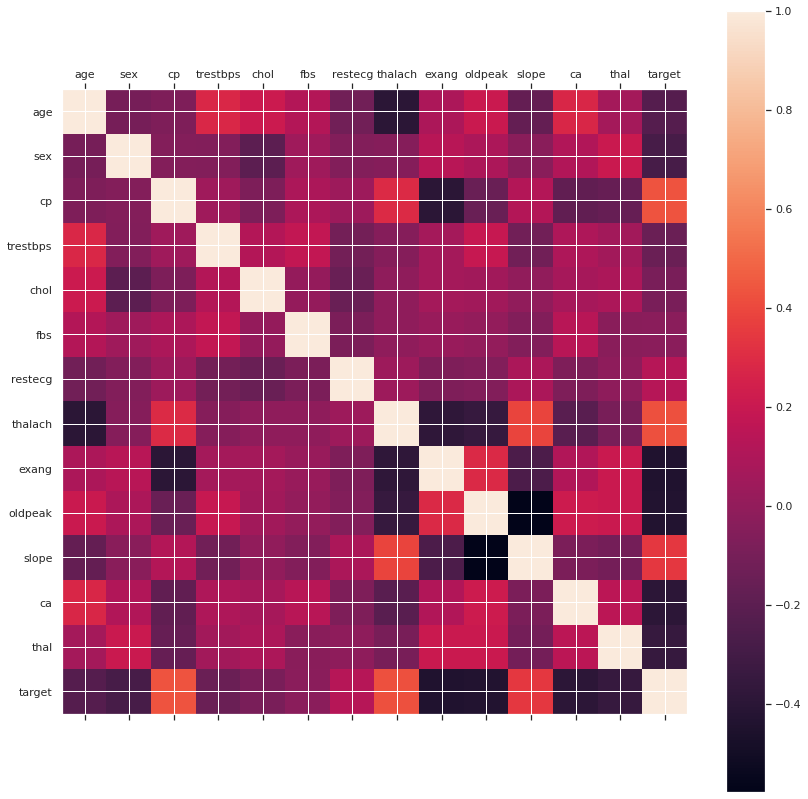

In [ ]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb79a1b5210>,
      dtype=object)

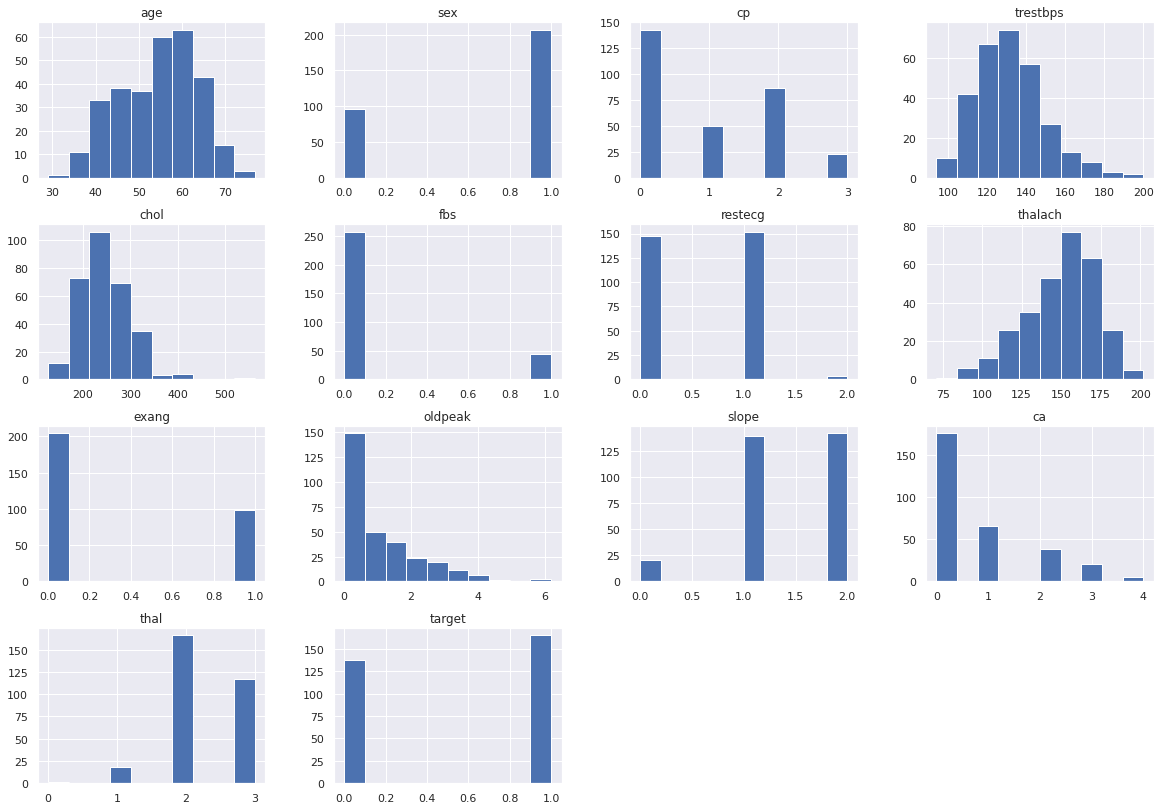

In [ ]:
data.hist()

**Target** 


Text(0.5, 1.0, 'Count of each Target Class')

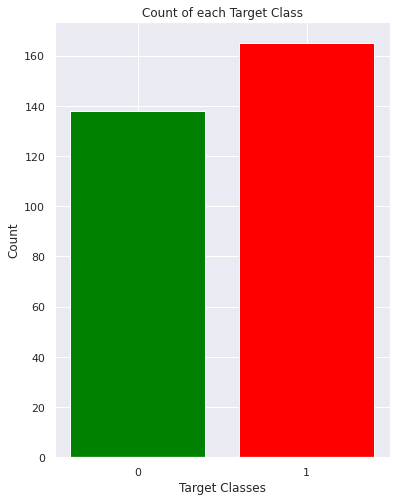

In [ ]:
rcParams['figure.figsize'] = 6,8
plt.bar(data['target'].unique(), data['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

**Sex**

In [ ]:
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Text(0.5, 1.0, 'Count of each Gender ')

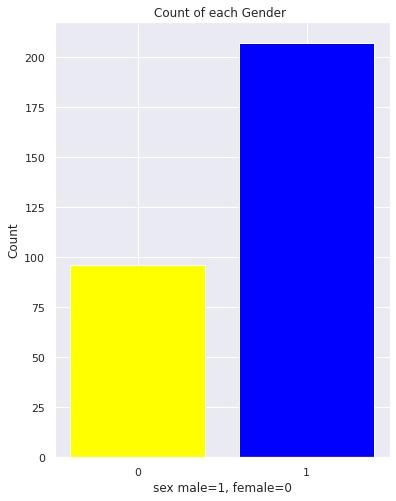

In [ ]:
rcParams['figure.figsize'] = 6,8
plt.bar(data['sex'].unique(), data['sex'].value_counts(), color = ['blue', 'yellow'])
plt.xticks([0, 1])
plt.xlabel('sex male=1, female=0')
plt.ylabel('Count')
plt.title('Count of each Gender ')

Analyze target with sex feature

In [ ]:
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


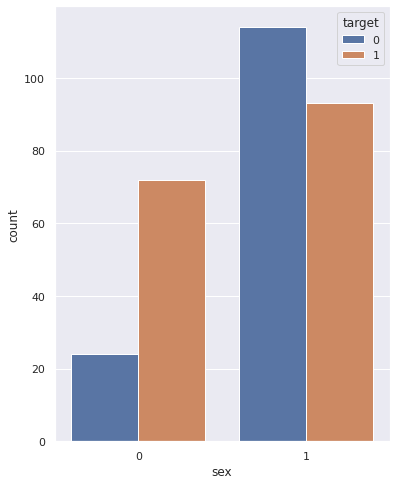

In [ ]:
sns.countplot(x='sex', hue='target', data=data)

Text(0.5, 1.0, 'Violin Plot of Age by Class, Separated by Sex')

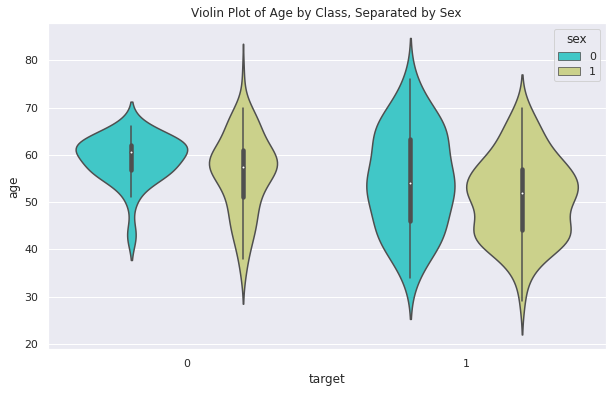

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x='target',y="age",data=data, hue='sex', palette='rainbow')
plt.title("Violin Plot of Age by Class, Separated by Sex")

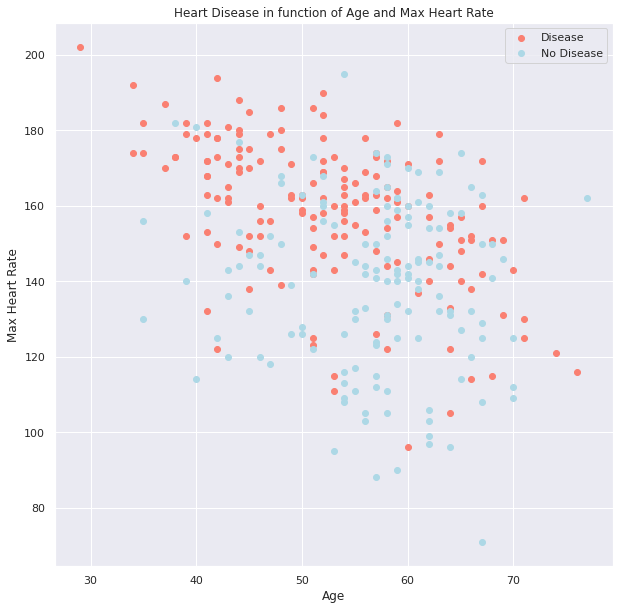

In [ ]:

plt.figure(figsize=(10,10))

#Scatter with positive examples
plt.scatter(data.age[data.target==1],
           data.thalach[data.target==1],
           c="salmon")

#Scatter with negative examples
plt.scatter(data.age[data.target==0],
           data.thalach[data.target==0],
           c="lightblue");

#Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

In [ ]:

data1 = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
data1

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
standardScaler = StandardScaler()  #scales each feature/variable to unit variance.
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data1[columns_to_scale] = standardScaler.fit_transform(data1[columns_to_scale])

In [ ]:
X = data1.drop(['target'], axis=1) #Aim is to find whether have disease or not.label=target
y = data1.target

In [ ]:
y.shape, X.shape

((303,), (303, 30))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 58)

# KNN



In [ ]:

knn_scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))

Text(0.5, 1.0, 'KNN scores for 1-21 K values')

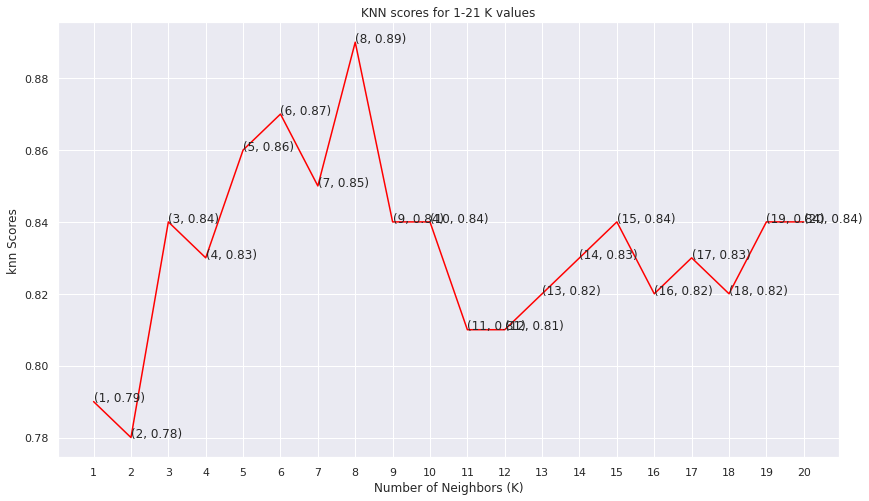

In [ ]:
rcParams['figure.figsize'] = 14,8

plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')

for i in range(1,21):
    plt.text(i, round(knn_scores[i-1],3), (i, round(knn_scores[i-1],4)))

plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('knn Scores')
plt.title('KNN scores for 1-21 K values')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn=knn.predict(X_test)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 89.0 %


# LogisticRegression()




In [ ]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(100,)

In [ ]:
LR_score = accuracy_score(Y_pred_lr,y_test)*100


print("The accuracy score achieved using Logistic Regression is: " , LR_score)

The accuracy score achieved using Logistic Regression is:  86.0


# Support Vector Classifier


In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'SVC scores for different kernels')

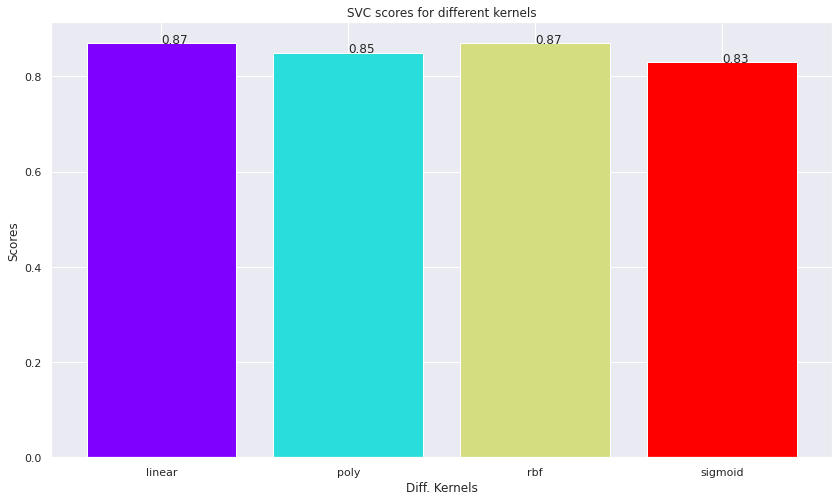

In [ ]:
from matplotlib.cm import rainbow

colors = rainbow(np.linspace(0, 1, len(kernels)))

plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Diff. Kernels')
plt.ylabel('Scores')
plt.title('SVC scores for different kernels')

In [ ]:
svc_classifier = SVC(kernel = 'rbf')
svc_classifier.fit(X_train, y_train)
svc_scores = svc_classifier.score(X_test, y_test)

In [ ]:
Y_pred_svm = svc_classifier.predict(X_test)
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 87.0 %


# random forest classifier


In [ ]:
rf_model = RandomForestClassifier()


grid_space={'max_depth':[3,5,10],
              'n_estimators':[10,100,200]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf_model,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X,y)

In [ ]:
print('Best hyperparameters are: ', model_grid.best_params_)


Best hyperparameters are:  {'max_depth': 3, 'n_estimators': 200}


In [ ]:
rf_model = RandomForestClassifier(max_depth = 5, n_estimators = 200)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest Classifier is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest Classifier is: 86.0 %


In [ ]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Random Forest Classifier is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest Classifier is: 86.0 %


# Analyze all models


In [ ]:
scores = [LR_score, score_svm,score_knn,score_rf]
algorithms = ["Logistic Regression","Support Vector Machine","K-Nearest Neighbors","Random Forest classifier"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.0 %
The accuracy score achieved using Support Vector Machine is: 87.0 %
The accuracy score achieved using K-Nearest Neighbors is: 89.0 %
The accuracy score achieved using Random Forest classifier is: 86.0 %


K-Nearest Neighbour classification algorithm gives highest accuracy among all 4 classification algorithm we choose for prediction

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


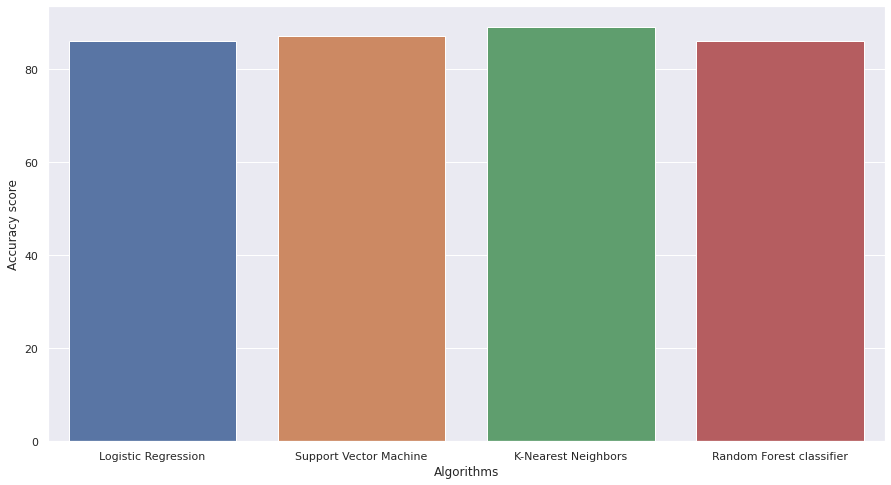

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)